## Stock price history of Xiaomi (XIACF) using LSTM

Analise a serie temporal histórica de 1 ativo de sua escolha utilizando a biblioteca do Yahoo Finance e extraia algum padrão para tentar prever uma tendência futura para os próximos 5 dias.
Gere gráficos das análises realizadas para tornar a previsão mais visual.

In [ ]:
# lib imports
!pip install yfinance

import torch
import torch.nn as nn

import numpy as np 
import pandas as pd
import yfinance as yf
import datetime
import time
import math
#import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from keras.layers import Dense, LSTM, Activation, Dropout
from keras.models import Sequential
#from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.recurrent import LSTM

import seaborn as sns

In [ ]:
# set the start and end date
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,12,10)

# create dataframe
stock_xiaomi = pd.DataFrame()

# download the stock price in the date range
stock_xiaomi = yf.download("XIACF",start=start, end=end, progress=False)
stock_xiaomi.head()
print('Number of rows and columns:', stock_xiaomi.shape)
stock_xiaomi
#stock_xiaomi.columns
stock_xiaomi['Date'] = stock_xiaomi.index


Number of rows and columns: (581, 6)


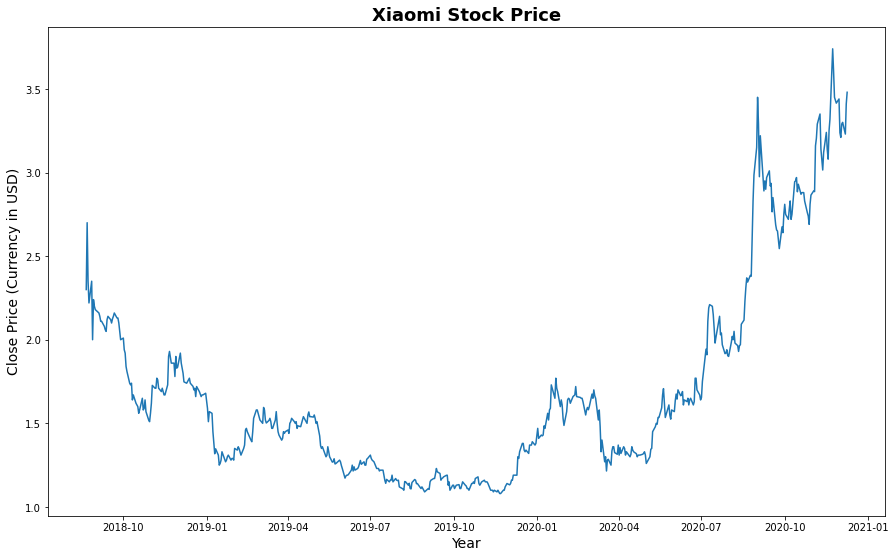

In [ ]:
#dataframe plots

plt.figure(figsize = (15,9))
plt.plot(stock_xiaomi[['Close']])
plt.title("Xiaomi Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Year',fontsize=14)
plt.ylabel('Close Price (Currency in USD)',fontsize=14)
plt.show()


#plt.figure()
#plt.plot(stock_xiaomi["Open"])
#plt.plot(stock_xiaomi["High"])
#plt.plot(stock_xiaomi["Low"])
#plt.plot(stock_xiaomi["Close"])
#plt.title('Xiaomi stock price history')
#plt.ylabel('Price (USD)')
#plt.xlabel('Days')
#plt.legend(['Open','High','Low','Close'], loc='upper left')
#plt.show()


In [ ]:
# new data frame with the close price only

data=stock_xiaomi.sort_index(ascending=True,axis=0)
new_df=pd.DataFrame(index=range(0,len(stock_xiaomi)),columns=['Date','Close'])

for i in range(0,len(data)):
  new_df["Date"][i]=data['Date'][i]
  new_df["Close"][i]=data["Close"][i]

train_data=final_dataset[0:581,:]
valid_data=final_dataset[581:,:]

new_df.index=new_df.Date
new_df.drop("Date",axis=1,inplace=True)

# scale the dataset before set it to the network
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_df)



TypeError: ignored

In [ ]:
'''
Create a training data set that contains the past 60 day closing price values 
that we want to use to predict the 61st closing price value.

The first column in the ‘x_train’ data set will contain values
from the data set from index 0 to index 59 (60 values total)

The second column will contain values from the data set from 
index 1 to index 60 (60 values) and so on and so forth.

The ‘y_train’ data set will contain the 61st value located 
at index 60 for it’s first column and the 62nd value
located at index 61 of the data set for it’s second value and so on and so forth.
'''

train_data = scaled_data[0:training_data_len  , : ]

# separate into train and test set
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# convert train df to np arrays to use for LSTM model training
x_train, y_train = np.array(x_train), np.array(y_train)

# reshape into number of samples, number of time steps, number of features
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

NameError: ignored

##Create LSTM model: 
### layers with 50 neurons, two Dense layers: one with 25 neurons and the other with 1 neuron

In [ ]:
# LSTM model

# prepare  optimzier 
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
               input_shape=(x_train.shape[1],1)))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dense(units=25))
lstm_model.add(Dense(units=1))
print(lstm_model.summary())

#Compile the model
lstm_model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

### Training the model

In [ ]:
lstm_model.fit(x_train, y_train,
          epochs=1,
          batch_size=1)

405/405 [==============================] - 11s 27ms/step - loss: 0.0017 - accuracy: 0.0049


### Testing the model

In [ ]:
# test data set
test_data = scaled_data[training_data_len - 60: , : ]

# split the dataset into x_test and y_test sets
x_test = []
y_test =  closedprice[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# convert x_test to a numpy array to testing the LSTM model
x_test = np.array(x_test)

In [ ]:
# reshape x_test into 3-dimensional in the form (n.samples, n.time_steps, n.features)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
# get the predicted values from the model
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

### Using Root Mean Squared Rrror (RMSE) to evaluate the model

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.21648794691664644

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


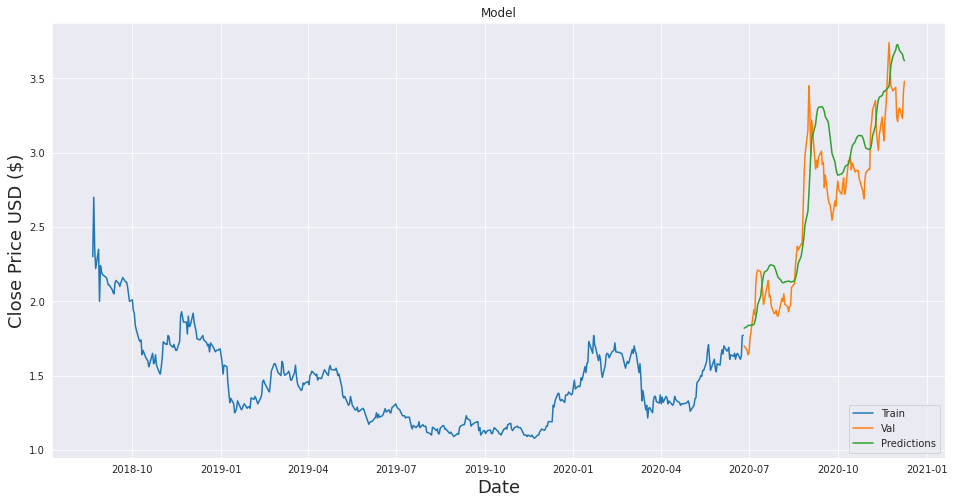

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the real and predicted prices
valid

,Close,Predictions
Date,,
2020-06-26,1.700,1.819279
2020-06-29,1.670,1.830160
2020-06-30,1.640,1.836971
2020-07-01,1.655,1.838505
2020-07-02,1.750,1.837950
...,...,...
2020-12-03,3.290,3.708277
2020-12-04,3.300,3.685718
2020-12-07,3.230,3.661946


In [ ]:
 
#Get the quoted price
xiaomi_quote = yf.download('XIACF', data_source='yahoo', start='2010-12-9', end='2020-12-10')

new_df = xiaomi_quote.filter(['Close'])

# last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[3.2156897]]


In [ ]:
#Get the quote

xiaomi_quote2 = yf.download('XIACF', data_source='yahoo', start='2020-12-9', end='2020-12-10')
print(xiaomi_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2020-12-09    3.48
Name: Close, dtype: float64
